In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
import scipy
import pylab
import math
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# from tensorflow.keras.optimizers import Adam, SGD, RMSprop
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.models import Sequential

#Библиотеки для stacking
from vecstack import stacking
#from pystacknet.pystacknet import StackNetRegressor #проблема с установкой
from mlxtend.regressor import StackingCVRegressor
from mlens.ensemble import SuperLearner
from sklearn.ensemble import StackingRegressor

%matplotlib inline

[MLENS] backend: threading


In [4]:
df = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры Ектб/Квартиры_Ектб_раб.xlsx', sheet_name = 0)
df

,Цена,Прогноз_catb_1,Прогноз_catb_2,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,...,Этаж,Пассажирский лифт,Двор,Парковка,Высота потолков,В доме,Грузовой лифт,Техника,Тёплый пол,Запланирован снос
0,12200000,1.315284e+07,1.244111e+07,12741835.0,1.307682e+07,1.283019e+07,1.277860e+07,10.032591,0,2662.039991,...,16 из 16,2,"детская площадка, спортивная площадка",подземная,NaN,NaN,NaN,NaN,NaN,NaN
1,3672000,3.581414e+06,3.451325e+06,3788324.5,3.860409e+06,3.441493e+06,3.607021e+06,9.063572,0,-6012.449904,...,3 из 4,NaN,NaN,NaN,3 м,NaN,NaN,NaN,NaN,NaN
2,4950000,4.464122e+06,4.239897e+06,4349611.0,4.360099e+06,4.266249e+06,4.351210e+06,9.062723,0,22922.841278,...,1 из 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5890000,6.581619e+06,6.233236e+06,6356236.0,6.769846e+06,6.392300e+06,6.390364e+06,9.033269,0,3774.725466,...,3 из 6,NaN,NaN,открытая во дворе,2.7 м,газ,NaN,NaN,NaN,NaN
4,5390000,5.651550e+06,5.600148e+06,5661739.5,5.624131e+06,5.572903e+06,5.637813e+06,10.424938,0,-30742.074763,...,10 из 23,1,закрытая территория,NaN,NaN,NaN,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7581,17800000,1.662160e+07,1.634537e+07,17103258.0,1.725586e+07,1.705123e+07,1.669007e+07,10.303444,0,894.780267,...,13 из 20,2,"закрытая территория, детская площадка",подземная,2.8 м,NaN,1,"холодильник, стиральная машина, посудомоечная...",есть,NaN
7582,6100000,5.628494e+06,5.637310e+06,5682841.5,5.683466e+06,5.534101e+06,5.649548e+06,8.972290,0,-6026.088792,...,3 из 5,нет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7583,9826880,8.336584e+06,8.382148e+06,8694407.0,8.440710e+06,8.355624e+06,8.471046e+06,10.164845,0,-1919.172274,...,8 из 11,2,детская площадка,подземная,NaN,газ,NaN,"кондиционер, холодильник, посудомоечная машина",NaN,NaN
7584,4350000,5.165433e+06,4.457764e+06,4197503.5,4.196797e+06,4.620189e+06,4.606900e+06,10.062153,0,-15178.908880,...,10 из 16,1,"закрытая территория, детская площадка, спорти...",за шлагбаумом во дворе,2.7 м,консьерж,2,NaN,NaN,NaN


In [5]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Этаж_4']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

#Если вы используете scikit-learn версии ниже 1.0, вам необходимо использовать get_feature_names метод. 
#Для более новых версий scikit-learn get_feature_names_out будет работать нормально.

,Цена,Прогноз_catb_1,Прогноз_catb_2,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,...,Техника,Тёплый пол,Запланирован снос,Этаж_4_25 и более,Этаж_4_не важно,Этаж_4_первый,Этаж_4_последний,Этаж_4_этажи 11-25,Этаж_4_этажи 2-5,Этаж_4_этажи 6-10
0,12200000,1.315284e+07,1.244111e+07,12741835.0,1.307682e+07,1.283019e+07,1.277860e+07,10.032591,0,2662.039991,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3672000,3.581414e+06,3.451325e+06,3788324.5,3.860409e+06,3.441493e+06,3.607021e+06,9.063572,0,-6012.449904,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4950000,4.464122e+06,4.239897e+06,4349611.0,4.360099e+06,4.266249e+06,4.351210e+06,9.062723,0,22922.841278,...,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,5890000,6.581619e+06,6.233236e+06,6356236.0,6.769846e+06,6.392300e+06,6.390364e+06,9.033269,0,3774.725466,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5390000,5.651550e+06,5.600148e+06,5661739.5,5.624131e+06,5.572903e+06,5.637813e+06,10.424938,0,-30742.074763,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7581,17800000,1.662160e+07,1.634537e+07,17103258.0,1.725586e+07,1.705123e+07,1.669007e+07,10.303444,0,894.780267,...,"холодильник, стиральная машина, посудомоечная...",есть,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7582,6100000,5.628494e+06,5.637310e+06,5682841.5,5.683466e+06,5.534101e+06,5.649548e+06,8.972290,0,-6026.088792,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7583,9826880,8.336584e+06,8.382148e+06,8694407.0,8.440710e+06,8.355624e+06,8.471046e+06,10.164845,0,-1919.172274,...,"кондиционер, холодильник, посудомоечная машина",NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7584,4350000,5.165433e+06,4.457764e+06,4197503.5,4.196797e+06,4.620189e+06,4.606900e+06,10.062153,0,-15178.908880,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Ремонт']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

,Цена,Прогноз_catb_1,Прогноз_catb_2,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,...,Этаж_4_первый,Этаж_4_последний,Этаж_4_этажи 11-25,Этаж_4_этажи 2-5,Этаж_4_этажи 6-10,Ремонт_дизайнерский,Ремонт_евро,Ремонт_стандартный,Ремонт_требует ремонта,Ремонт_элитный
0,12200000,1.315284e+07,1.244111e+07,12741835.0,1.307682e+07,1.283019e+07,1.277860e+07,10.032591,0,2662.039991,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3672000,3.581414e+06,3.451325e+06,3788324.5,3.860409e+06,3.441493e+06,3.607021e+06,9.063572,0,-6012.449904,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4950000,4.464122e+06,4.239897e+06,4349611.0,4.360099e+06,4.266249e+06,4.351210e+06,9.062723,0,22922.841278,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5890000,6.581619e+06,6.233236e+06,6356236.0,6.769846e+06,6.392300e+06,6.390364e+06,9.033269,0,3774.725466,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5390000,5.651550e+06,5.600148e+06,5661739.5,5.624131e+06,5.572903e+06,5.637813e+06,10.424938,0,-30742.074763,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7581,17800000,1.662160e+07,1.634537e+07,17103258.0,1.725586e+07,1.705123e+07,1.669007e+07,10.303444,0,894.780267,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7582,6100000,5.628494e+06,5.637310e+06,5682841.5,5.683466e+06,5.534101e+06,5.649548e+06,8.972290,0,-6026.088792,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7583,9826880,8.336584e+06,8.382148e+06,8694407.0,8.440710e+06,8.355624e+06,8.471046e+06,10.164845,0,-1919.172274,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7584,4350000,5.165433e+06,4.457764e+06,4197503.5,4.196797e+06,4.620189e+06,4.606900e+06,10.062153,0,-15178.908880,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [7]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Материал_2']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

,Цена,Прогноз_catb_1,Прогноз_catb_2,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,...,Этаж_4_этажи 2-5,Этаж_4_этажи 6-10,Ремонт_дизайнерский,Ремонт_евро,Ремонт_стандартный,Ремонт_требует ремонта,Ремонт_элитный,Материал_2_кирпичный,Материал_2_монолитный,Материал_2_панельный
0,12200000,1.315284e+07,1.244111e+07,12741835.0,1.307682e+07,1.283019e+07,1.277860e+07,10.032591,0,2662.039991,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3672000,3.581414e+06,3.451325e+06,3788324.5,3.860409e+06,3.441493e+06,3.607021e+06,9.063572,0,-6012.449904,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,4950000,4.464122e+06,4.239897e+06,4349611.0,4.360099e+06,4.266249e+06,4.351210e+06,9.062723,0,22922.841278,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,5890000,6.581619e+06,6.233236e+06,6356236.0,6.769846e+06,6.392300e+06,6.390364e+06,9.033269,0,3774.725466,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5390000,5.651550e+06,5.600148e+06,5661739.5,5.624131e+06,5.572903e+06,5.637813e+06,10.424938,0,-30742.074763,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7581,17800000,1.662160e+07,1.634537e+07,17103258.0,1.725586e+07,1.705123e+07,1.669007e+07,10.303444,0,894.780267,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7582,6100000,5.628494e+06,5.637310e+06,5682841.5,5.683466e+06,5.534101e+06,5.649548e+06,8.972290,0,-6026.088792,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7583,9826880,8.336584e+06,8.382148e+06,8694407.0,8.440710e+06,8.355624e+06,8.471046e+06,10.164845,0,-1919.172274,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7584,4350000,5.165433e+06,4.457764e+06,4197503.5,4.196797e+06,4.620189e+06,4.606900e+06,10.062153,0,-15178.908880,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [8]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Раст_центр_2']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

,Цена,Прогноз_catb_1,Прогноз_catb_2,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,...,Материал_2_кирпичный,Материал_2_монолитный,Материал_2_панельный,Раст_центр_2_более 10000,Раст_центр_2_до 500,Раст_центр_2_от 1000 до 1500,Раст_центр_2_от 1500 до 3000,Раст_центр_2_от 3000 до 5000,Раст_центр_2_от 500 до 1000,Раст_центр_2_от 5000 до 10000
0,12200000,1.315284e+07,1.244111e+07,12741835.0,1.307682e+07,1.283019e+07,1.277860e+07,10.032591,0,2662.039991,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3672000,3.581414e+06,3.451325e+06,3788324.5,3.860409e+06,3.441493e+06,3.607021e+06,9.063572,0,-6012.449904,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4950000,4.464122e+06,4.239897e+06,4349611.0,4.360099e+06,4.266249e+06,4.351210e+06,9.062723,0,22922.841278,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5890000,6.581619e+06,6.233236e+06,6356236.0,6.769846e+06,6.392300e+06,6.390364e+06,9.033269,0,3774.725466,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5390000,5.651550e+06,5.600148e+06,5661739.5,5.624131e+06,5.572903e+06,5.637813e+06,10.424938,0,-30742.074763,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7581,17800000,1.662160e+07,1.634537e+07,17103258.0,1.725586e+07,1.705123e+07,1.669007e+07,10.303444,0,894.780267,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7582,6100000,5.628494e+06,5.637310e+06,5682841.5,5.683466e+06,5.534101e+06,5.649548e+06,8.972290,0,-6026.088792,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7583,9826880,8.336584e+06,8.382148e+06,8694407.0,8.440710e+06,8.355624e+06,8.471046e+06,10.164845,0,-1919.172274,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7584,4350000,5.165433e+06,4.457764e+06,4197503.5,4.196797e+06,4.620189e+06,4.606900e+06,10.062153,0,-15178.908880,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Раст_метро_2']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

,Цена,Прогноз_catb_1,Прогноз_catb_2,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,...,Раст_центр_2_более 10000,Раст_центр_2_до 500,Раст_центр_2_от 1000 до 1500,Раст_центр_2_от 1500 до 3000,Раст_центр_2_от 3000 до 5000,Раст_центр_2_от 500 до 1000,Раст_центр_2_от 5000 до 10000,Раст_метро_2_на удалении от метро,Раст_метро_2_не выжно,Раст_метро_2_рядом с метро
0,12200000,1.315284e+07,1.244111e+07,12741835.0,1.307682e+07,1.283019e+07,1.277860e+07,10.032591,0,2662.039991,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,3672000,3.581414e+06,3.451325e+06,3788324.5,3.860409e+06,3.441493e+06,3.607021e+06,9.063572,0,-6012.449904,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,4950000,4.464122e+06,4.239897e+06,4349611.0,4.360099e+06,4.266249e+06,4.351210e+06,9.062723,0,22922.841278,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5890000,6.581619e+06,6.233236e+06,6356236.0,6.769846e+06,6.392300e+06,6.390364e+06,9.033269,0,3774.725466,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5390000,5.651550e+06,5.600148e+06,5661739.5,5.624131e+06,5.572903e+06,5.637813e+06,10.424938,0,-30742.074763,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7581,17800000,1.662160e+07,1.634537e+07,17103258.0,1.725586e+07,1.705123e+07,1.669007e+07,10.303444,0,894.780267,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7582,6100000,5.628494e+06,5.637310e+06,5682841.5,5.683466e+06,5.534101e+06,5.649548e+06,8.972290,0,-6026.088792,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7583,9826880,8.336584e+06,8.382148e+06,8694407.0,8.440710e+06,8.355624e+06,8.471046e+06,10.164845,0,-1919.172274,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7584,4350000,5.165433e+06,4.457764e+06,4197503.5,4.196797e+06,4.620189e+06,4.606900e+06,10.062153,0,-15178.908880,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [10]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Район_2']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

,Цена,Прогноз_catb_1,Прогноз_catb_2,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,...,Район_2_УНЦ,Район_2_Уктус,Район_2_Уралмаш,Район_2_Химмаш,Район_2_Центр,Район_2_Центральный,Район_2_Шарташ,Район_2_Эльмаш,Район_2_Юго-Западный,Район_2_Южный
0,12200000,1.315284e+07,1.244111e+07,12741835.0,1.307682e+07,1.283019e+07,1.277860e+07,10.032591,0,2662.039991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3672000,3.581414e+06,3.451325e+06,3788324.5,3.860409e+06,3.441493e+06,3.607021e+06,9.063572,0,-6012.449904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4950000,4.464122e+06,4.239897e+06,4349611.0,4.360099e+06,4.266249e+06,4.351210e+06,9.062723,0,22922.841278,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5890000,6.581619e+06,6.233236e+06,6356236.0,6.769846e+06,6.392300e+06,6.390364e+06,9.033269,0,3774.725466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5390000,5.651550e+06,5.600148e+06,5661739.5,5.624131e+06,5.572903e+06,5.637813e+06,10.424938,0,-30742.074763,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7581,17800000,1.662160e+07,1.634537e+07,17103258.0,1.725586e+07,1.705123e+07,1.669007e+07,10.303444,0,894.780267,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7582,6100000,5.628494e+06,5.637310e+06,5682841.5,5.683466e+06,5.534101e+06,5.649548e+06,8.972290,0,-6026.088792,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7583,9826880,8.336584e+06,8.382148e+06,8694407.0,8.440710e+06,8.355624e+06,8.471046e+06,10.164845,0,-1919.172274,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7584,4350000,5.165433e+06,4.457764e+06,4197503.5,4.196797e+06,4.620189e+06,4.606900e+06,10.062153,0,-15178.908880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['Санузел_3_En'] = encoder.fit_transform(df[['Санузел_3']])
df['Многоуровневая_En'] = encoder.fit_transform(df[['Многоуровневая']])
df['Терраса_En'] = encoder.fit_transform(df[['Терраса']])
df['ЖК_En'] = encoder.fit_transform(df[['ЖК']])
df

C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y 

,Цена,Прогноз_catb_1,Прогноз_catb_2,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,...,Район_2_Центр,Район_2_Центральный,Район_2_Шарташ,Район_2_Эльмаш,Район_2_Юго-Западный,Район_2_Южный,Санузел_3_En,Многоуровневая_En,Терраса_En,ЖК_En
0,12200000,1.315284e+07,1.244111e+07,12741835.0,1.307682e+07,1.283019e+07,1.277860e+07,10.032591,0,2662.039991,...,0.0,0.0,0.0,0.0,1.0,0.0,0,1,1,0
1,3672000,3.581414e+06,3.451325e+06,3788324.5,3.860409e+06,3.441493e+06,3.607021e+06,9.063572,0,-6012.449904,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0
2,4950000,4.464122e+06,4.239897e+06,4349611.0,4.360099e+06,4.266249e+06,4.351210e+06,9.062723,0,22922.841278,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0
3,5890000,6.581619e+06,6.233236e+06,6356236.0,6.769846e+06,6.392300e+06,6.390364e+06,9.033269,0,3774.725466,...,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1,0
4,5390000,5.651550e+06,5.600148e+06,5661739.5,5.624131e+06,5.572903e+06,5.637813e+06,10.424938,0,-30742.074763,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7581,17800000,1.662160e+07,1.634537e+07,17103258.0,1.725586e+07,1.705123e+07,1.669007e+07,10.303444,0,894.780267,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0
7582,6100000,5.628494e+06,5.637310e+06,5682841.5,5.683466e+06,5.534101e+06,5.649548e+06,8.972290,0,-6026.088792,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0
7583,9826880,8.336584e+06,8.382148e+06,8694407.0,8.440710e+06,8.355624e+06,8.471046e+06,10.164845,0,-1919.172274,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
7584,4350000,5.165433e+06,4.457764e+06,4197503.5,4.196797e+06,4.620189e+06,4.606900e+06,10.062153,0,-15178.908880,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0


In [49]:
X = df[[
         'ОПлощадь',
         'ЖПлощадь_catb',
         'Этажность_1',
         'ГП_3',
         'Этаж_4_25 и более',
         'Этаж_4_не важно',
         'Этаж_4_первый',
         'Этаж_4_последний',
         'Этаж_4_этажи 11-25',
         'Этаж_4_этажи 2-5',
         'Этаж_4_этажи 6-10',
         'Ремонт_дизайнерский',
         'Ремонт_евро',
         'Ремонт_стандартный',
         'Ремонт_требует ремонта',
         'Ремонт_элитный',
         'Материал_2_кирпичный',
         'Материал_2_монолитный',
         'Материал_2_панельный',
         'Раст_центр_2_более 10000',
         'Раст_центр_2_до 500',
         'Раст_центр_2_от 1000 до 1500',
         'Раст_центр_2_от 1500 до 3000',
         'Раст_центр_2_от 3000 до 5000',
         'Раст_центр_2_от 500 до 1000',
         'Раст_центр_2_от 5000 до 10000',
         'Раст_метро_2_на удалении от метро',
         'Раст_метро_2_не выжно',
         'Раст_метро_2_рядом с метро',
         'Район_2_Академический',
         'Район_2_Большеконный',
         'Район_2_Ботанический',
         'Район_2_ВИЗ',
         'Район_2_Вокзальный',
         'Район_2_Волгоградский',
         'Район_2_Вторчермет',
         'Район_2_Втузгородок',
         'Район_2_Елизавет',
         'Район_2_Заречный',
         'Район_2_Звездочка',
         'Район_2_Зеленая Роща',
         'Район_2_Зеленая горка',
         'Район_2_Изоплит',
         'Район_2_Калиновский',
         'Район_2_Клевер Парк',
         'Район_2_Кольцово',
         'Район_2_Компрессорный',
         'Район_2_Комсомольский_1',
         'Район_2_Комсомольский_2',
         'Район_2_Космонавтов',
         'Район_2_Лечебный',
         'Район_2_Новая сортировка',
         'Район_2_Парковой',
         'Район_2_Первомайский',
         'Район_2_Пионерский',
         'Район_2_Птицефабрика',
         'Район_2_Рудный',
         'Район_2_Сибирский',
         'Район_2_Синие Камни',
         'Район_2_Солнечный',
         'Район_2_Старая сортировка',
         'Район_2_УНЦ',
         'Район_2_Уктус',
         'Район_2_Уралмаш',
         'Район_2_Химмаш',
         'Район_2_Центр',
         'Район_2_Центральный',
         'Район_2_Шарташ',
         'Район_2_Эльмаш',
         'Район_2_Юго-Западный',
         'Район_2_Южный',
         'Санузел_3_En',
         'Многоуровневая_En',
         'Терраса_En',
         'ЖК_En'
       ]]

Y = df['Цена']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 0)

task:         [regression]
metric:       [mean_absolute_error]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [CatBoostRegressor]
    fold  0:  [686872.82710193]
    fold  1:  [637910.82031145]
    fold  2:  [638403.27222822]
    ----
    MEAN:     [654395.63988053] + [22965.71930193]
    FULL:     [654400.67666515]

model  1:     [Pipeline]
    fold  0:  [829502.74101879]
    fold  1:  [779611.86660554]
    fold  2:  [830763.46585200]
    ----
    MEAN:     [813292.69115878] + [23821.50028463]
    FULL:     [813295.20512433]

model  2:     [XGBRegressor]
    fold  0:  [711339.33831395]
    fold  1:  [671715.57090507]
    fold  2:  [714187.51907864]
    ----
    MEAN:     [699080.80943256] + [19385.04996411]
    FULL:     [699082.71056917]

model  3:     [LGBMRegressor]
    fold  0:  [742035.58963293]
    fold  1:  [716130.49029809]
    fold  2:  [717666.10566953]
    ----
    MEAN:     [725277.39520018] + [11866.40465422]
    FULL:     [725279.99417575]

model  4:     [

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


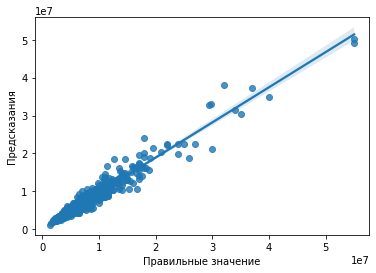

In [62]:
models = [CatBoostRegressor(iterations = 2500, 
                            random_seed = 5, 
                            learning_rate = 0.03, #0,008
                            one_hot_max_size = 45, #нет
                            max_depth = 4, #5
                            verbose = 0),
          make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes = (256, 64, 32), 
                                                       activation = 'relu', 
                                                       solver = 'adam', 
                                                       alpha = 2, 
                                                       max_iter = 5000)),
          XGBRegressor(),
          LGBMRegressor(),
          DecisionTreeRegressor()]
        
S_train, S_test = stacking(models, 
                           X_train, 
                           Y_train, 
                           X_test, 
                           regression = True, 
                           metric = mae, 
                           n_folds = 3,
                           shuffle = True, 
                           random_state = 0, 
                           verbose = 2)

#можно попробовать NN
reg = LinearRegression()
reg = reg.fit(S_train, Y_train)

#preds = clf.predict(S_test)
#plt_sct(y_test,preds)

pred_train = reg.predict(S_train)
mse_train = mse(Y_train, pred_train)

print("MAE на обучении:", round(mae(Y_train, pred_train), 4))
print("RMSE на обучении:", round(sqrt(mse(Y_train, pred_train)), 4))
print("MAPE на обучении:", round(mape(Y_train, pred_train), 4))
print(f'Train R2 {r2_score(Y_train, pred_train):.4f}')

pred_test = reg.predict(S_test)
mse_test = mse(Y_test, pred_test)

print("MAE на тесте:", round(mae(Y_test, pred_test), 4))
print("RMSE на тесте:", round(sqrt(mse(Y_test, pred_test)), 4))
print("MAPE на тесте:", round(mape(Y_test, pred_test), 4))
print(f'Test R2 {r2_score(Y_test, pred_test):.4f}')

sns.regplot(Y_test, pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

In [51]:
Y_train

4713     3900000
5913     7200000
4504     4300000
5092     6650000
2939     4790000
          ...   
4931     5750000
3264     5100000
1653    11000000
2607    32000000
2732     3000000
Name: Цена, Length: 6448, dtype: int64

In [52]:
Y_test

2921    3650000
3937    2650000
3261    5200000
713     4350000
1461    3330000
         ...   
3073    5190000
3432    8600000
7002    8350000
3225    4590000
4061    8500000
Name: Цена, Length: 1138, dtype: int64

In [ ]:
pred_train = reg.predict(S_train)
pred_test = reg.predict(S_test)

In [53]:
m_1 = pd.DataFrame(Y_train) #columns = ['Y_train']
m_1

,Цена
4713,3900000
5913,7200000
4504,4300000
5092,6650000
2939,4790000
...,...
4931,5750000
3264,5100000
1653,11000000
2607,32000000


In [54]:
m_1['прогноз'] = pred_train
m_1

,Цена,прогноз
4713,3900000,3.929945e+06
5913,7200000,6.566452e+06
4504,4300000,5.453872e+06
5092,6650000,7.658896e+06
2939,4790000,4.054888e+06
...,...,...
4931,5750000,4.978519e+06
3264,5100000,4.933567e+06
1653,11000000,1.220188e+07
2607,32000000,2.948196e+07


In [55]:
m_1d = m_1.drop(['Цена'], axis = 'columns') 
m_1d

,прогноз
4713,3.929945e+06
5913,6.566452e+06
4504,5.453872e+06
5092,7.658896e+06
2939,4.054888e+06
...,...
4931,4.978519e+06
3264,4.933567e+06
1653,1.220188e+07
2607,2.948196e+07


In [56]:
m_2 = pd.DataFrame(Y_test) #columns = ['Y_train']
m_2

,Цена
2921,3650000
3937,2650000
3261,5200000
713,4350000
1461,3330000
...,...
3073,5190000
3432,8600000
7002,8350000
3225,4590000


In [57]:
m_2['прогноз'] = pred_test
m_2

,Цена,прогноз
2921,3650000,3.558431e+06
3937,2650000,2.597354e+06
3261,5200000,5.457311e+06
713,4350000,4.630909e+06
1461,3330000,3.587662e+06
...,...,...
3073,5190000,5.249354e+06
3432,8600000,5.574453e+06
7002,8350000,8.727126e+06
3225,4590000,4.403212e+06


In [58]:
m_2d = m_2.drop(['Цена'], axis = 'columns') 
m_2d

,прогноз
2921,3.558431e+06
3937,2.597354e+06
3261,5.457311e+06
713,4.630909e+06
1461,3.587662e+06
...,...
3073,5.249354e+06
3432,5.574453e+06
7002,8.727126e+06
3225,4.403212e+06


In [59]:
y_pred = pd.concat([m_1d, m_2d], ignore_index = False)
y_pred

,прогноз
4713,3.929945e+06
5913,6.566452e+06
4504,5.453872e+06
5092,7.658896e+06
2939,4.054888e+06
...,...
3073,5.249354e+06
3432,5.574453e+06
7002,8.727126e+06
3225,4.403212e+06


In [60]:
y_pred = y_pred.sort_index(ascending = True)
y_pred

,прогноз
0,1.283019e+07
1,3.441493e+06
2,4.266249e+06
3,6.392300e+06
4,5.572903e+06
...,...
7581,1.705123e+07
7582,5.534101e+06
7583,8.355624e+06
7584,4.620189e+06


In [61]:
#Сохраняем в Excel
writer = pd.ExcelWriter('Квартиры(ектб)_прогноз_stack.xlsx')
y_pred.to_excel(writer, 'прогноз')
writer.save()

C:\Users\skapr\AppData\Local\Temp\ipykernel_12016\1378414433.py:4: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [ ]:
#CV

In [17]:
X = df[[
         'ОПлощадь',
         'ЖПлощадь_catb',
         'Этажность_1',
         'ГП_3',
         'Этаж_4_25 и более',
         'Этаж_4_не важно',
         'Этаж_4_первый',
         'Этаж_4_последний',
         'Этаж_4_этажи 11-25',
         'Этаж_4_этажи 2-5',
         'Этаж_4_этажи 6-10',
         'Ремонт_дизайнерский',
         'Ремонт_евро',
         'Ремонт_стандартный',
         'Ремонт_требует ремонта',
         'Ремонт_элитный',
         'Материал_2_кирпичный',
         'Материал_2_монолитный',
         'Материал_2_панельный',
         'Раст_центр_2_более 10000',
         'Раст_центр_2_до 500',
         'Раст_центр_2_от 1000 до 1500',
         'Раст_центр_2_от 1500 до 3000',
         'Раст_центр_2_от 3000 до 5000',
         'Раст_центр_2_от 500 до 1000',
         'Раст_центр_2_от 5000 до 10000',
         'Раст_метро_2_на удалении от метро',
         'Раст_метро_2_не выжно',
         'Раст_метро_2_рядом с метро',
         'Район_2_Академический',
         'Район_2_Большеконный',
         'Район_2_Ботанический',
         'Район_2_ВИЗ',
         'Район_2_Вокзальный',
         'Район_2_Волгоградский',
         'Район_2_Вторчермет',
         'Район_2_Втузгородок',
         'Район_2_Елизавет',
         'Район_2_Заречный',
         'Район_2_Звездочка',
         'Район_2_Зеленая Роща',
         'Район_2_Зеленая горка',
         'Район_2_Изоплит',
         'Район_2_Калиновский',
         'Район_2_Клевер Парк',
         'Район_2_Кольцово',
         'Район_2_Компрессорный',
         'Район_2_Комсомольский_1',
         'Район_2_Комсомольский_2',
         'Район_2_Космонавтов',
         'Район_2_Лечебный',
         'Район_2_Новая сортировка',
         'Район_2_Парковой',
         'Район_2_Первомайский',
         'Район_2_Пионерский',
         'Район_2_Птицефабрика',
         'Район_2_Рудный',
         'Район_2_Сибирский',
         'Район_2_Синие Камни',
         'Район_2_Солнечный',
         'Район_2_Старая сортировка',
         'Район_2_УНЦ',
         'Район_2_Уктус',
         'Район_2_Уралмаш',
         'Район_2_Химмаш',
         'Район_2_Центр',
         'Район_2_Центральный',
         'Район_2_Шарташ',
         'Район_2_Эльмаш',
         'Район_2_Юго-Западный',
         'Район_2_Южный',
         'Санузел_3_En',
         'Многоуровневая_En',
         'Терраса_En',
         'ЖК_En'
       ]]

Y = df['Цена']

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

#n_folds = 7
#kf = KFold(n_splits = n_folds,  = False, random_state = 0)

shuffle_split = ShuffleSplit(n_splits = 7, test_size = 0.15, random_state = 0)

#массив для сохранения итоговых оценок
all_rmse = [] 
all_mae = []
all_mape = []
all_r2 = []

for n, (tr_index, te_index) in enumerate(shuffle_split.split(X, Y)): #kf.split(X, Y)
    print('Обработка процесса №', n)
    
    # Split data and target
    X_train = X.iloc[tr_index]
    Y_train = Y.iloc[tr_index]
    X_test = X.iloc[te_index]
    Y_test = Y.iloc[te_index]
    
    models = [CatBoostRegressor(iterations = 2500, 
                                random_seed = 5, 
                                learning_rate = 0.03, #0,008
                                one_hot_max_size = 45, #нет
                                max_depth = 4, #5
                                verbose = 0),
              make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes = (256, 64, 32), 
                                                           activation = 'relu', 
                                                           solver = 'adam', 
                                                           alpha = 2, 
                                                           max_iter = 5000)),
              XGBRegressor(),
              LGBMRegressor(),
              DecisionTreeRegressor()]

    S_train, S_test = stacking(models, 
                               X_train, 
                               Y_train, 
                               X_test, 
                               regression = True, 
                               metric = mae, 
                               n_folds = 3,
                               shuffle = True, 
                               random_state = 0, 
                               verbose = 2)

    #можно попробовать NN
    reg = LinearRegression()
    reg = reg.fit(S_train, Y_train)

    pred_test = reg.predict(S_test)
    mse_test = mse(Y_test, pred_test)
    
    all_rmse.append(round(sqrt(mse(Y_test, pred_test)), 4))
    all_mae.append(round(mae(Y_test, pred_test), 4))
    all_mape.append(round(mape(Y_test, pred_test), 4))
    all_r2.append(r2_score(Y_test, pred_test))

Обработка процесса № 0
task:         [regression]
metric:       [mean_absolute_error]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [CatBoostRegressor]
    fold  0:  [686872.82710193]
    fold  1:  [637910.82031145]
    fold  2:  [638403.27222822]
    ----
    MEAN:     [654395.63988053] + [22965.71930193]
    FULL:     [654400.67666515]

model  1:     [Pipeline]
    fold  0:  [819222.79001525]
    fold  1:  [795185.42932670]
    fold  2:  [833497.85512606]
    ----
    MEAN:     [815968.69148933] + [15809.32974692]
    FULL:     [815969.19615722]

model  2:     [XGBRegressor]
    fold  0:  [711339.33831395]
    fold  1:  [671715.57090507]
    fold  2:  [714187.51907864]
    ----
    MEAN:     [699080.80943256] + [19385.04996411]
    FULL:     [699082.71056917]

model  3:     [LGBMRegressor]
    fold  0:  [742035.58963293]
    fold  1:  [716130.49029809]
    fold  2:  [717666.10566953]
    ----
    MEAN:     [725277.39520018] + [11866.40465422]
    FULL:     [725279.994

    fold  1:  [708158.38170584]
    fold  2:  [719996.27927839]
    ----
    MEAN:     [719934.55716179] + [9590.10835929]
    FULL:     [719936.37391945]

model  4:     [DecisionTreeRegressor]
    fold  0:  [1001344.70155039]
    fold  1:  [951447.47743136]
    fold  2:  [944727.31828758]
    ----
    MEAN:     [965839.83242311] + [25255.19000837]
    FULL:     [965845.33876137]



In [20]:
# массив оценок по k блокам
print('RMSE:', all_rmse)
print('MAE:', all_mae)
print('MAPE:', all_mape)
print('R2:', all_r2)

RMSE: [1033842.1269, 1106546.7704, 1019054.5441, 1134791.2581, 1500576.6333, 1439252.023, 1060177.7747]
MAE: [594106.7223, 619736.1625, 604383.5798, 629439.8377, 658939.1638, 620263.7754, 600739.1259]
MAPE: [0.0837, 0.0871, 0.0872, 0.0863, 0.0874, 0.0881, 0.0854]
R2: [0.9474538305758443, 0.9323893842755396, 0.9437422611827885, 0.9394952967850669, 0.9245361021807081, 0.9134789914646358, 0.9372544343797633]


In [21]:
# среднее значение mae
print('RMSE_mean:', np.mean(all_rmse))
print('MAE_mean:', np.mean(all_mae))
print('MAPE_mean:', np.mean(all_mape))
print('R2_mean:', np.mean(all_r2))

RMSE_mean: 1184891.5900714286
MAE_mean: 618229.7667714285
MAPE_mean: 0.08645714285714286
R2_mean: 0.9340500429777638


# Исключаем Выбросы_1

In [3]:
df = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры Ектб/выбросы.xlsx', sheet_name = 0)
df

,Цена,Прогноз_catb,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,MAE,...,Этаж,Пассажирский лифт,Двор,Парковка,Высота потолков,В доме,Грузовой лифт,Техника,Тёплый пол,Запланирован снос
0,12200000,1.274182e+07,12741835.0,1.307682e+07,1.283019e+07,1.274183e+07,10.032591,0,2662.039991,-5.418159e+05,...,16 из 16,2,"детская площадка, спортивная площадка",подземная,NaN,NaN,NaN,NaN,NaN,NaN
1,3672000,3.426564e+06,3788324.5,3.860409e+06,3.441493e+06,3.607444e+06,9.063572,0,-6012.449904,2.454361e+05,...,3 из 4,NaN,NaN,NaN,3 м,NaN,NaN,NaN,NaN,NaN
2,4950000,4.333199e+06,4349611.0,4.360099e+06,4.266249e+06,4.341405e+06,9.062723,0,22922.841278,6.168008e+05,...,1 из 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5890000,6.521101e+06,6356236.0,6.769846e+06,6.392300e+06,6.438668e+06,9.033269,0,3774.725466,-6.311007e+05,...,3 из 6,NaN,NaN,открытая во дворе,2.7 м,газ,NaN,NaN,NaN,NaN
4,5390000,5.689062e+06,5661739.5,5.624131e+06,5.572903e+06,5.675401e+06,10.424938,0,-30742.074763,-2.990624e+05,...,10 из 23,1,закрытая территория,NaN,NaN,NaN,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,17800000,1.686068e+07,17103258.0,1.725586e+07,1.705123e+07,1.698197e+07,10.303444,0,894.780267,9.393182e+05,...,13 из 20,2,"закрытая территория, детская площадка",подземная,2.8 м,NaN,1,"холодильник, стиральная машина, посудомоечная...",есть,NaN
7540,6100000,5.654543e+06,5682841.5,5.683466e+06,5.534101e+06,5.668692e+06,8.972290,0,-6026.088792,4.454575e+05,...,3 из 5,нет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7541,9826880,8.059268e+06,8694407.0,8.440710e+06,8.355624e+06,8.376838e+06,10.164845,0,-1919.172274,1.767612e+06,...,8 из 11,2,детская площадка,подземная,NaN,газ,NaN,"кондиционер, холодильник, посудомоечная машина",NaN,NaN
7542,4350000,4.590546e+06,4197503.5,4.196797e+06,4.620189e+06,4.394025e+06,10.062153,0,-15178.908880,-2.405455e+05,...,10 из 16,1,"закрытая территория, детская площадка, спорти...",за шлагбаумом во дворе,2.7 м,консьерж,2,NaN,NaN,NaN


In [4]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Этаж_4']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

#Если вы используете scikit-learn версии ниже 1.0, вам необходимо использовать get_feature_names метод. 
#Для более новых версий scikit-learn get_feature_names_out будет работать нормально.

,Цена,Прогноз_catb,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,MAE,...,Техника,Тёплый пол,Запланирован снос,Этаж_4_25 и более,Этаж_4_не важно,Этаж_4_первый,Этаж_4_последний,Этаж_4_этажи 11-25,Этаж_4_этажи 2-5,Этаж_4_этажи 6-10
0,12200000,1.274182e+07,12741835.0,1.307682e+07,1.283019e+07,1.274183e+07,10.032591,0,2662.039991,-5.418159e+05,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3672000,3.426564e+06,3788324.5,3.860409e+06,3.441493e+06,3.607444e+06,9.063572,0,-6012.449904,2.454361e+05,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4950000,4.333199e+06,4349611.0,4.360099e+06,4.266249e+06,4.341405e+06,9.062723,0,22922.841278,6.168008e+05,...,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,5890000,6.521101e+06,6356236.0,6.769846e+06,6.392300e+06,6.438668e+06,9.033269,0,3774.725466,-6.311007e+05,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5390000,5.689062e+06,5661739.5,5.624131e+06,5.572903e+06,5.675401e+06,10.424938,0,-30742.074763,-2.990624e+05,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,17800000,1.686068e+07,17103258.0,1.725586e+07,1.705123e+07,1.698197e+07,10.303444,0,894.780267,9.393182e+05,...,"холодильник, стиральная машина, посудомоечная...",есть,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7540,6100000,5.654543e+06,5682841.5,5.683466e+06,5.534101e+06,5.668692e+06,8.972290,0,-6026.088792,4.454575e+05,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7541,9826880,8.059268e+06,8694407.0,8.440710e+06,8.355624e+06,8.376838e+06,10.164845,0,-1919.172274,1.767612e+06,...,"кондиционер, холодильник, посудомоечная машина",NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7542,4350000,4.590546e+06,4197503.5,4.196797e+06,4.620189e+06,4.394025e+06,10.062153,0,-15178.908880,-2.405455e+05,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Ремонт']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

,Цена,Прогноз_catb,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,MAE,...,Этаж_4_не важно,Этаж_4_первый,Этаж_4_последний,Этаж_4_этажи 11-25,Этаж_4_этажи 2-5,Этаж_4_этажи 6-10,Ремонт_дизайнерский,Ремонт_евро,Ремонт_стандартный,Ремонт_требует ремонта
0,12200000,1.274182e+07,12741835.0,1.307682e+07,1.283019e+07,1.274183e+07,10.032591,0,2662.039991,-5.418159e+05,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3672000,3.426564e+06,3788324.5,3.860409e+06,3.441493e+06,3.607444e+06,9.063572,0,-6012.449904,2.454361e+05,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,4950000,4.333199e+06,4349611.0,4.360099e+06,4.266249e+06,4.341405e+06,9.062723,0,22922.841278,6.168008e+05,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5890000,6.521101e+06,6356236.0,6.769846e+06,6.392300e+06,6.438668e+06,9.033269,0,3774.725466,-6.311007e+05,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,5390000,5.689062e+06,5661739.5,5.624131e+06,5.572903e+06,5.675401e+06,10.424938,0,-30742.074763,-2.990624e+05,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,17800000,1.686068e+07,17103258.0,1.725586e+07,1.705123e+07,1.698197e+07,10.303444,0,894.780267,9.393182e+05,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7540,6100000,5.654543e+06,5682841.5,5.683466e+06,5.534101e+06,5.668692e+06,8.972290,0,-6026.088792,4.454575e+05,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7541,9826880,8.059268e+06,8694407.0,8.440710e+06,8.355624e+06,8.376838e+06,10.164845,0,-1919.172274,1.767612e+06,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7542,4350000,4.590546e+06,4197503.5,4.196797e+06,4.620189e+06,4.394025e+06,10.062153,0,-15178.908880,-2.405455e+05,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [6]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Материал_2']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

,Цена,Прогноз_catb,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,MAE,...,Этаж_4_этажи 11-25,Этаж_4_этажи 2-5,Этаж_4_этажи 6-10,Ремонт_дизайнерский,Ремонт_евро,Ремонт_стандартный,Ремонт_требует ремонта,Материал_2_кирпичный,Материал_2_монолитный,Материал_2_панельный
0,12200000,1.274182e+07,12741835.0,1.307682e+07,1.283019e+07,1.274183e+07,10.032591,0,2662.039991,-5.418159e+05,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3672000,3.426564e+06,3788324.5,3.860409e+06,3.441493e+06,3.607444e+06,9.063572,0,-6012.449904,2.454361e+05,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,4950000,4.333199e+06,4349611.0,4.360099e+06,4.266249e+06,4.341405e+06,9.062723,0,22922.841278,6.168008e+05,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,5890000,6.521101e+06,6356236.0,6.769846e+06,6.392300e+06,6.438668e+06,9.033269,0,3774.725466,-6.311007e+05,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,5390000,5.689062e+06,5661739.5,5.624131e+06,5.572903e+06,5.675401e+06,10.424938,0,-30742.074763,-2.990624e+05,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,17800000,1.686068e+07,17103258.0,1.725586e+07,1.705123e+07,1.698197e+07,10.303444,0,894.780267,9.393182e+05,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7540,6100000,5.654543e+06,5682841.5,5.683466e+06,5.534101e+06,5.668692e+06,8.972290,0,-6026.088792,4.454575e+05,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7541,9826880,8.059268e+06,8694407.0,8.440710e+06,8.355624e+06,8.376838e+06,10.164845,0,-1919.172274,1.767612e+06,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7542,4350000,4.590546e+06,4197503.5,4.196797e+06,4.620189e+06,4.394025e+06,10.062153,0,-15178.908880,-2.405455e+05,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [7]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Раст_центр_2']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

,Цена,Прогноз_catb,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,MAE,...,Материал_2_кирпичный,Материал_2_монолитный,Материал_2_панельный,Раст_центр_2_более 10000,Раст_центр_2_до 500,Раст_центр_2_от 1000 до 1500,Раст_центр_2_от 1500 до 3000,Раст_центр_2_от 3000 до 5000,Раст_центр_2_от 500 до 1000,Раст_центр_2_от 5000 до 10000
0,12200000,1.274182e+07,12741835.0,1.307682e+07,1.283019e+07,1.274183e+07,10.032591,0,2662.039991,-5.418159e+05,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3672000,3.426564e+06,3788324.5,3.860409e+06,3.441493e+06,3.607444e+06,9.063572,0,-6012.449904,2.454361e+05,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4950000,4.333199e+06,4349611.0,4.360099e+06,4.266249e+06,4.341405e+06,9.062723,0,22922.841278,6.168008e+05,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5890000,6.521101e+06,6356236.0,6.769846e+06,6.392300e+06,6.438668e+06,9.033269,0,3774.725466,-6.311007e+05,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5390000,5.689062e+06,5661739.5,5.624131e+06,5.572903e+06,5.675401e+06,10.424938,0,-30742.074763,-2.990624e+05,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,17800000,1.686068e+07,17103258.0,1.725586e+07,1.705123e+07,1.698197e+07,10.303444,0,894.780267,9.393182e+05,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7540,6100000,5.654543e+06,5682841.5,5.683466e+06,5.534101e+06,5.668692e+06,8.972290,0,-6026.088792,4.454575e+05,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7541,9826880,8.059268e+06,8694407.0,8.440710e+06,8.355624e+06,8.376838e+06,10.164845,0,-1919.172274,1.767612e+06,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7542,4350000,4.590546e+06,4197503.5,4.196797e+06,4.620189e+06,4.394025e+06,10.062153,0,-15178.908880,-2.405455e+05,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Раст_метро_2']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

,Цена,Прогноз_catb,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,MAE,...,Раст_центр_2_более 10000,Раст_центр_2_до 500,Раст_центр_2_от 1000 до 1500,Раст_центр_2_от 1500 до 3000,Раст_центр_2_от 3000 до 5000,Раст_центр_2_от 500 до 1000,Раст_центр_2_от 5000 до 10000,Раст_метро_2_на удалении от метро,Раст_метро_2_не выжно,Раст_метро_2_рядом с метро
0,12200000,1.274182e+07,12741835.0,1.307682e+07,1.283019e+07,1.274183e+07,10.032591,0,2662.039991,-5.418159e+05,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,3672000,3.426564e+06,3788324.5,3.860409e+06,3.441493e+06,3.607444e+06,9.063572,0,-6012.449904,2.454361e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,4950000,4.333199e+06,4349611.0,4.360099e+06,4.266249e+06,4.341405e+06,9.062723,0,22922.841278,6.168008e+05,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5890000,6.521101e+06,6356236.0,6.769846e+06,6.392300e+06,6.438668e+06,9.033269,0,3774.725466,-6.311007e+05,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5390000,5.689062e+06,5661739.5,5.624131e+06,5.572903e+06,5.675401e+06,10.424938,0,-30742.074763,-2.990624e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,17800000,1.686068e+07,17103258.0,1.725586e+07,1.705123e+07,1.698197e+07,10.303444,0,894.780267,9.393182e+05,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7540,6100000,5.654543e+06,5682841.5,5.683466e+06,5.534101e+06,5.668692e+06,8.972290,0,-6026.088792,4.454575e+05,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7541,9826880,8.059268e+06,8694407.0,8.440710e+06,8.355624e+06,8.376838e+06,10.164845,0,-1919.172274,1.767612e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7542,4350000,4.590546e+06,4197503.5,4.196797e+06,4.620189e+06,4.394025e+06,10.062153,0,-15178.908880,-2.405455e+05,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [9]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Район_2']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

,Цена,Прогноз_catb,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,MAE,...,Район_2_УНЦ,Район_2_Уктус,Район_2_Уралмаш,Район_2_Химмаш,Район_2_Центр,Район_2_Центральный,Район_2_Шарташ,Район_2_Эльмаш,Район_2_Юго-Западный,Район_2_Южный
0,12200000,1.274182e+07,12741835.0,1.307682e+07,1.283019e+07,1.274183e+07,10.032591,0,2662.039991,-5.418159e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3672000,3.426564e+06,3788324.5,3.860409e+06,3.441493e+06,3.607444e+06,9.063572,0,-6012.449904,2.454361e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4950000,4.333199e+06,4349611.0,4.360099e+06,4.266249e+06,4.341405e+06,9.062723,0,22922.841278,6.168008e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5890000,6.521101e+06,6356236.0,6.769846e+06,6.392300e+06,6.438668e+06,9.033269,0,3774.725466,-6.311007e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5390000,5.689062e+06,5661739.5,5.624131e+06,5.572903e+06,5.675401e+06,10.424938,0,-30742.074763,-2.990624e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,17800000,1.686068e+07,17103258.0,1.725586e+07,1.705123e+07,1.698197e+07,10.303444,0,894.780267,9.393182e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7540,6100000,5.654543e+06,5682841.5,5.683466e+06,5.534101e+06,5.668692e+06,8.972290,0,-6026.088792,4.454575e+05,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7541,9826880,8.059268e+06,8694407.0,8.440710e+06,8.355624e+06,8.376838e+06,10.164845,0,-1919.172274,1.767612e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7542,4350000,4.590546e+06,4197503.5,4.196797e+06,4.620189e+06,4.394025e+06,10.062153,0,-15178.908880,-2.405455e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['Санузел_3_En'] = encoder.fit_transform(df[['Санузел_3']])
df['Многоуровневая_En'] = encoder.fit_transform(df[['Многоуровневая']])
df['Терраса_En'] = encoder.fit_transform(df[['Терраса']])
df['ЖК_En'] = encoder.fit_transform(df[['ЖК']])
df['Вид_En'] = encoder.fit_transform(df[['Вид']])
df

C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y 

,Цена,Прогноз_catb,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,MAE,...,Район_2_Центральный,Район_2_Шарташ,Район_2_Эльмаш,Район_2_Юго-Западный,Район_2_Южный,Санузел_3_En,Многоуровневая_En,Терраса_En,ЖК_En,Вид_En
0,12200000,1.274182e+07,12741835.0,1.307682e+07,1.283019e+07,1.274183e+07,10.032591,0,2662.039991,-5.418159e+05,...,0.0,0.0,0.0,1.0,0.0,0,1,1,0,1
1,3672000,3.426564e+06,3788324.5,3.860409e+06,3.441493e+06,3.607444e+06,9.063572,0,-6012.449904,2.454361e+05,...,0.0,0.0,0.0,0.0,0.0,1,1,1,0,1
2,4950000,4.333199e+06,4349611.0,4.360099e+06,4.266249e+06,4.341405e+06,9.062723,0,22922.841278,6.168008e+05,...,0.0,0.0,0.0,0.0,0.0,1,1,1,0,1
3,5890000,6.521101e+06,6356236.0,6.769846e+06,6.392300e+06,6.438668e+06,9.033269,0,3774.725466,-6.311007e+05,...,0.0,0.0,0.0,0.0,1.0,0,1,1,0,1
4,5390000,5.689062e+06,5661739.5,5.624131e+06,5.572903e+06,5.675401e+06,10.424938,0,-30742.074763,-2.990624e+05,...,0.0,0.0,0.0,0.0,0.0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,17800000,1.686068e+07,17103258.0,1.725586e+07,1.705123e+07,1.698197e+07,10.303444,0,894.780267,9.393182e+05,...,0.0,0.0,0.0,0.0,0.0,1,1,1,0,1
7540,6100000,5.654543e+06,5682841.5,5.683466e+06,5.534101e+06,5.668692e+06,8.972290,0,-6026.088792,4.454575e+05,...,0.0,0.0,0.0,0.0,0.0,1,1,1,0,1
7541,9826880,8.059268e+06,8694407.0,8.440710e+06,8.355624e+06,8.376838e+06,10.164845,0,-1919.172274,1.767612e+06,...,0.0,0.0,0.0,0.0,0.0,0,1,1,0,1
7542,4350000,4.590546e+06,4197503.5,4.196797e+06,4.620189e+06,4.394025e+06,10.062153,0,-15178.908880,-2.405455e+05,...,0.0,0.0,0.0,0.0,0.0,1,1,1,0,1


In [11]:
X = df[[
         'ОПлощадь',
         'ЖПлощадь_catb',
         'Этажность_1',
         'ГП_3',
         'Этаж_4_25 и более',
         'Этаж_4_не важно',
         'Этаж_4_первый',
         'Этаж_4_последний',
         'Этаж_4_этажи 11-25',
         'Этаж_4_этажи 2-5',
         'Этаж_4_этажи 6-10',
         'Ремонт_дизайнерский',
         'Ремонт_евро',
         'Ремонт_стандартный',
         'Ремонт_требует ремонта',
#         'Ремонт_элитный',
         'Материал_2_кирпичный',
         'Материал_2_монолитный',
         'Материал_2_панельный',
         'Раст_центр_2_более 10000',
         'Раст_центр_2_до 500',
         'Раст_центр_2_от 1000 до 1500',
         'Раст_центр_2_от 1500 до 3000',
         'Раст_центр_2_от 3000 до 5000',
         'Раст_центр_2_от 500 до 1000',
         'Раст_центр_2_от 5000 до 10000',
         'Раст_метро_2_на удалении от метро',
         'Раст_метро_2_не выжно',
         'Раст_метро_2_рядом с метро',
         'Район_2_Академический',
         'Район_2_Большеконный',
         'Район_2_Ботанический',
         'Район_2_ВИЗ',
         'Район_2_Вокзальный',
         'Район_2_Волгоградский',
         'Район_2_Вторчермет',
         'Район_2_Втузгородок',
         'Район_2_Елизавет',
         'Район_2_Заречный',
         'Район_2_Звездочка',
         'Район_2_Зеленая Роща',
         'Район_2_Зеленая горка',
         'Район_2_Изоплит',
         'Район_2_Калиновский',
         'Район_2_Клевер Парк',
         'Район_2_Кольцово',
         'Район_2_Компрессорный',
         'Район_2_Комсомольский_1',
         'Район_2_Комсомольский_2',
         'Район_2_Космонавтов',
         'Район_2_Лечебный',
         'Район_2_Новая сортировка',
         'Район_2_Парковой',
         'Район_2_Первомайский',
         'Район_2_Пионерский',
         'Район_2_Птицефабрика',
         'Район_2_Рудный',
         'Район_2_Сибирский',
         'Район_2_Синие Камни',
         'Район_2_Солнечный',
         'Район_2_Старая сортировка',
         'Район_2_УНЦ',
         'Район_2_Уктус',
         'Район_2_Уралмаш',
         'Район_2_Химмаш',
         'Район_2_Центр',
         'Район_2_Центральный',
         'Район_2_Шарташ',
         'Район_2_Эльмаш',
         'Район_2_Юго-Западный',
         'Район_2_Южный',
         'Санузел_3_En',
         'Многоуровневая_En',
         'Терраса_En',
         'ЖК_En',
         'Вид_En'
       ]]

Y = df['Цена']

X = np.array(X)
Y = np.array(Y)

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 0)

task:         [regression]
metric:       [mean_absolute_error]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [CatBoostRegressor]
    fold  0:  [607709.00596590]
    fold  1:  [613284.84352558]
    fold  2:  [630593.39716214]
    ----
    MEAN:     [617195.74888454] + [9743.21047878]
    FULL:     [617194.26935508]

model  1:     [Pipeline]
    fold  0:  [827417.89424153]
    fold  1:  [768097.75813937]
    fold  2:  [777281.27961860]
    ----
    MEAN:     [790932.31066650] + [26070.19528501]
    FULL:     [790938.00086980]

model  2:     [XGBRegressor]
    fold  0:  [623829.18422591]
    fold  1:  [643724.87587740]
    fold  2:  [664071.41266963]
    ----
    MEAN:     [643875.15759098] + [16429.16463639]
    FULL:     [643872.03126949]

model  3:     [LGBMRegressor]
    fold  0:  [622074.80991278]
    fold  1:  [638786.29611238]
    fold  2:  [672404.57919156]
    ----
    MEAN:     [644421.89507224] + [20929.90524969]
    FULL:     [644418.40987493]

model  4:     [D

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


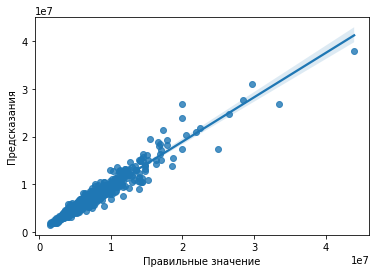

In [12]:
models = [CatBoostRegressor(iterations = 2500, 
                            random_seed = 5, 
                            learning_rate = 0.03, #0,008
                            one_hot_max_size = 45, #нет
                            max_depth = 4, #5
                            verbose = 0),
          make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes = (256, 64, 32), 
                                                       activation = 'relu', 
                                                       solver = 'adam', 
                                                       alpha = 2, 
                                                       max_iter = 5000)),
          XGBRegressor(),
          LGBMRegressor(),
          DecisionTreeRegressor()]
        
S_train, S_test = stacking(models, 
                           X_train, 
                           Y_train, 
                           X_test, 
                           regression = True, 
                           metric = mae, 
                           n_folds = 3,
                           shuffle = True, 
                           random_state = 0, 
                           verbose = 2)

#можно попробовать NN
reg = LinearRegression()
reg = reg.fit(S_train, Y_train)

#preds = clf.predict(S_test)
#plt_sct(y_test,preds)

pred_train = reg.predict(S_train)
mse_train = mse(Y_train, pred_train)

print("MAE на обучении:", round(mae(Y_train, pred_train), 4))
print("RMSE на обучении:", round(sqrt(mse(Y_train, pred_train)), 4))
print("MAPE на обучении:", round(mape(Y_train, pred_train), 4))
print(f'Train R2 {r2_score(Y_train, pred_train):.4f}')

pred_test = reg.predict(S_test)
mse_test = mse(Y_test, pred_test)

print("MAE на тесте:", round(mae(Y_test, pred_test), 4))
print("RMSE на тесте:", round(sqrt(mse(Y_test, pred_test)), 4))
print("MAPE на тесте:", round(mape(Y_test, pred_test), 4))
print(f'Test R2 {r2_score(Y_test, pred_test):.4f}')

sns.regplot(Y_test, pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

In [ ]:
#CV

In [14]:
X = df[[
         'ОПлощадь',
         'ЖПлощадь_catb',
         'Этажность_1',
         'ГП_3',
         'Этаж_4_25 и более',
         'Этаж_4_не важно',
         'Этаж_4_первый',
         'Этаж_4_последний',
         'Этаж_4_этажи 11-25',
         'Этаж_4_этажи 2-5',
         'Этаж_4_этажи 6-10',
         'Ремонт_дизайнерский',
         'Ремонт_евро',
         'Ремонт_стандартный',
         'Ремонт_требует ремонта',
#         'Ремонт_элитный',
         'Материал_2_кирпичный',
         'Материал_2_монолитный',
         'Материал_2_панельный',
         'Раст_центр_2_более 10000',
         'Раст_центр_2_до 500',
         'Раст_центр_2_от 1000 до 1500',
         'Раст_центр_2_от 1500 до 3000',
         'Раст_центр_2_от 3000 до 5000',
         'Раст_центр_2_от 500 до 1000',
         'Раст_центр_2_от 5000 до 10000',
         'Раст_метро_2_на удалении от метро',
         'Раст_метро_2_не выжно',
         'Раст_метро_2_рядом с метро',
         'Район_2_Академический',
         'Район_2_Большеконный',
         'Район_2_Ботанический',
         'Район_2_ВИЗ',
         'Район_2_Вокзальный',
         'Район_2_Волгоградский',
         'Район_2_Вторчермет',
         'Район_2_Втузгородок',
         'Район_2_Елизавет',
         'Район_2_Заречный',
         'Район_2_Звездочка',
         'Район_2_Зеленая Роща',
         'Район_2_Зеленая горка',
         'Район_2_Изоплит',
         'Район_2_Калиновский',
         'Район_2_Клевер Парк',
         'Район_2_Кольцово',
         'Район_2_Компрессорный',
         'Район_2_Комсомольский_1',
         'Район_2_Комсомольский_2',
         'Район_2_Космонавтов',
         'Район_2_Лечебный',
         'Район_2_Новая сортировка',
         'Район_2_Парковой',
         'Район_2_Первомайский',
         'Район_2_Пионерский',
         'Район_2_Птицефабрика',
         'Район_2_Рудный',
         'Район_2_Сибирский',
         'Район_2_Синие Камни',
         'Район_2_Солнечный',
         'Район_2_Старая сортировка',
         'Район_2_УНЦ',
         'Район_2_Уктус',
         'Район_2_Уралмаш',
         'Район_2_Химмаш',
         'Район_2_Центр',
         'Район_2_Центральный',
         'Район_2_Шарташ',
         'Район_2_Эльмаш',
         'Район_2_Юго-Западный',
         'Район_2_Южный',
         'Санузел_3_En',
         'Многоуровневая_En',
         'Терраса_En',
         'ЖК_En',
         'Вид_En'
       ]]

Y = df['Цена']

In [15]:
%%time

from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

#n_folds = 7
#kf = KFold(n_splits = n_folds,  = False, random_state = 0)

shuffle_split = ShuffleSplit(n_splits = 7, test_size = 0.15, random_state = 0)

#массив для сохранения итоговых оценок
all_rmse = [] 
all_mae = []
all_mape = []
all_r2 = []

for n, (tr_index, te_index) in enumerate(shuffle_split.split(X, Y)): #kf.split(X, Y)
    print('Обработка процесса №', n)
    
    # Split data and target
    X_train = X.iloc[tr_index]
    Y_train = Y.iloc[tr_index]
    X_test = X.iloc[te_index]
    Y_test = Y.iloc[te_index]
    
    models = [CatBoostRegressor(iterations = 2500, 
                                random_seed = 5, 
                                learning_rate = 0.03, #0,008
                                one_hot_max_size = 45, #нет
                                max_depth = 4, #5
                                verbose = 0),
              make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes = (256, 64, 32), 
                                                           activation = 'relu', 
                                                           solver = 'adam', 
                                                           alpha = 2, 
                                                           max_iter = 5000)),
              XGBRegressor(),
              LGBMRegressor(),
              DecisionTreeRegressor()]

    S_train, S_test = stacking(models, 
                               X_train, 
                               Y_train, 
                               X_test, 
                               regression = True, 
                               metric = mae, 
                               n_folds = 3,
                               shuffle = True, 
                               random_state = 0, 
                               verbose = 2)

    #можно попробовать NN
    reg = LinearRegression()
    reg = reg.fit(S_train, Y_train)

    pred_test = reg.predict(S_test)
    mse_test = mse(Y_test, pred_test)
    
    all_rmse.append(round(sqrt(mse(Y_test, pred_test)), 4))
    all_mae.append(round(mae(Y_test, pred_test), 4))
    all_mape.append(round(mape(Y_test, pred_test), 4))
    all_r2.append(r2_score(Y_test, pred_test))

Обработка процесса № 0
task:         [regression]
metric:       [mean_absolute_error]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [CatBoostRegressor]
    fold  0:  [607709.00596590]
    fold  1:  [613284.84352558]
    fold  2:  [630593.39716214]
    ----
    MEAN:     [617195.74888454] + [9743.21047878]
    FULL:     [617194.26935508]

model  1:     [Pipeline]
    fold  0:  [774229.93337067]
    fold  1:  [763907.76916674]
    fold  2:  [826487.82527767]
    ----
    MEAN:     [788208.50927169] + [27393.62813840]
    FULL:     [788206.32920683]

model  2:     [XGBRegressor]
    fold  0:  [623829.18422591]
    fold  1:  [643724.87587740]
    fold  2:  [664071.41266963]
    ----
    MEAN:     [643875.15759098] + [16429.16463639]
    FULL:     [643872.03126949]

model  3:     [LGBMRegressor]
    fold  0:  [622074.80991278]
    fold  1:  [638786.29611238]
    fold  2:  [672404.57919156]
    ----
    MEAN:     [644421.89507224] + [20929.90524969]
    FULL:     [644418.4098

    fold  1:  [608903.26582666]
    fold  2:  [668865.38956987]
    ----
    MEAN:     [645028.09429090] + [25975.65109589]
    FULL:     [645030.01062483]

model  4:     [DecisionTreeRegressor]
    fold  0:  [891379.52291862]
    fold  1:  [847589.26345344]
    fold  2:  [963103.30556855]
    ----
    MEAN:     [900690.69731354] + [47615.80240426]
    FULL:     [900689.24516531]



In [16]:
# массив оценок по k блокам
print('RMSE:', all_rmse)
print('MAE:', all_mae)
print('MAPE:', all_mape)
print('R2:', all_r2)

RMSE: [894150.7242, 999330.4143, 1089313.7005, 1076088.0297, 931647.0847, 1020176.9643, 1107753.2624]
MAE: [533665.5949, 594561.3312, 623930.3351, 594085.7533, 570909.9976, 588788.5485, 628776.352]
MAPE: [0.0802, 0.0872, 0.0891, 0.0834, 0.0853, 0.0847, 0.0892]
R2: [0.9382184747590636, 0.9268902458785778, 0.9158652551243098, 0.9304363168986312, 0.9445710712004602, 0.9248073766603861, 0.9200820772585488]


In [17]:
# среднее значение mae
print('RMSE_mean:', np.mean(all_rmse))
print('MAE_mean:', np.mean(all_mae))
print('MAPE_mean:', np.mean(all_mape))
print('R2_mean:', np.mean(all_r2))

RMSE_mean: 1016922.8828714285
MAE_mean: 590673.9875142857
MAPE_mean: 0.08558571428571428
R2_mean: 0.9286958311114253


In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(n_splits = 7, test_size = 0.15, random_state = 0)

for n, (tr_index, te_index) in enumerate(shuffle_split.split(X, Y)):
    print(n, tr_index, te_index)

0 [4713 5913 4504 ... 1653 2607 2732] [2921 3937 3261 ... 7002 3225 4061]
1 [5369 2252 2658 ...  295 1657 2961] [7240 5983 7394 ... 2849 2622 2147]
2 [5742 4644 2213 ... 4200 6948 4651] [4136 3709 4340 ... 5410  218 4150]
3 [5454 7216 3146 ... 5989 4367  720] [5718 6695  970 ... 1216 4673  199]
4 [1848  555 3869 ... 3169 6081 6238] [2089 1060 3190 ... 5886    0 4344]
5 [5729 6769 1017 ... 4678 6820 1342] [2757 6162 4222 ... 5908 7197 6638]
6 [7461 1735  271 ... 5714 4731 7382] [2683 3691  744 ...  933 6045 1978]
